In [98]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
titanic_MD = pd.read_csv("Documents/GitHub/Data-Wrangling/Lab 8/Titanic_MD.csv")
titanic = pd.read_csv("Documents/GitHub/Data-Wrangling/Lab 8/Titanic.csv")

In [28]:
print("Titanic_MD dataset shape:", titanic_MD.shape)
titanic_MD.head()

Titanic_MD dataset shape: (183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


In [29]:
titanic_MD.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [30]:
titanic_MD.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [31]:
np.unique(titanic_MD['Sex'])

array(['?', 'female', 'male'], dtype=object)

In [32]:
np.unique(titanic_MD['Survived'])

array([0, 1], dtype=int64)

In [33]:
np.unique(titanic_MD['Pclass'])

array([1, 2, 3], dtype=int64)

In [34]:
cols = []
val = []
for col in titanic_MD.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(titanic_MD[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,51
2,Ticket,0
3,Cabin,0
4,Embarked,0


In [47]:
###En names, ticket y cabin no tenemos missing values, mientras que embarked tenemos missing values pero no '?'###

In [35]:
np.unique(titanic_MD['Age'])

array([ 0.92,  2.  ,  3.  ,  4.  ,  6.  , 11.  , 14.  , 15.  , 16.  ,
       17.  , 18.  , 19.  , 21.  , 22.  , 23.  , 24.  , 25.  , 27.  ,
       28.  , 29.  , 30.  , 31.  , 32.  , 33.  , 34.  , 35.  , 36.  ,
       36.5 , 37.  , 38.  , 39.  , 40.  , 41.  , 42.  , 43.  , 44.  ,
       45.  , 46.  , 47.  , 48.  , 49.  , 50.  , 51.  , 52.  , 53.  ,
       54.  , 55.  , 56.  , 58.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 70.  , 71.  , 80.  ,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])

In [59]:
##Luego de haber revisado el dataset es posible ver que tenemos en varias columnas (Age, Fare, Embarked, Parch y SibSp) missing values y en otras columnas como Sex ?##

In [36]:
titanic_MD.replace(r'\?', np.nan, regex = True, inplace = True)

In [37]:
titanic_MD.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [38]:
print("Titanic_MD dataset shape:", titanic_MD.shape)
titanic_MD.head()

Titanic_MD dataset shape: (183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


In [39]:
dummy = pd.get_dummies(titanic_MD['Sex'])
dummy.head()

,female,male
0,0,0
1,1,0
2,0,1
3,1,0
4,1,0


In [64]:
titanic_MD = pd.concat([titanic_MD, dummy], axis=1)
titanic_MD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,female,male
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0,0,0,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1,0,1,0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,0,1,0,1
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,1,0,1,0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,1,0,1,0


In [111]:
## Podemos ver ahora que ya cambiamos los ? de sex por valores que sean nulos para poder trabajarlos de igual manera ##

In [112]:
p1 = titanic_MD
p2 = titanic_MD
p3 = titanic_MD
p4 = titanic_MD
p5 = titanic_MD
p6 = titanic_MD
p7 = titanic_MD
p8 = titanic_MD
p9 = titanic_MD

In [66]:
##Aquí hacemos el pairwise##

In [67]:
p1 = p1.dropna().shape

In [68]:
##Ahora vamos a probar el listwise viendo una correlación entre los datos que se consideran más relacionados a la hora de ver si una 
##persona se logró salvar o no

In [69]:
p2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,female,male
PassengerId,1.000000,0.148495,-0.089136,-0.048190,-0.088806,-0.062083,0.022261,0.041373,-0.027259,0.041373,-0.027259
Survived,0.148495,1.000000,-0.034542,-0.257703,0.113987,-0.003365,0.119311,0.414562,-0.450584,0.414562,-0.450584
Pclass,-0.089136,-0.034542,1.000000,-0.297872,-0.102294,0.041969,-0.304438,0.039243,-0.044140,0.039243,-0.044140
Age,-0.048190,-0.257703,-0.297872,1.000000,-0.087951,-0.279548,-0.130979,-0.091257,0.162322,-0.091257,0.162322
SibSp,-0.088806,0.113987,-0.102294,-0.087951,1.000000,0.255152,0.299061,0.125637,-0.140812,0.125637,-0.140812
Parch,-0.062083,-0.003365,0.041969,-0.279548,0.255152,1.000000,0.381445,0.028537,-0.033974,0.028537,-0.033974
Fare,0.022261,0.119311,-0.304438,-0.130979,0.299061,0.381445,1.000000,0.035431,-0.101181,0.035431,-0.101181
female,0.041373,0.414562,0.039243,-0.091257,0.125637,0.028537,0.035431,1.000000,-0.563926,1.000000,-0.563926
male,-0.027259,-0.450584,-0.044140,0.162322,-0.140812,-0.033974,-0.101181,-0.563926,1.000000,-0.563926,1.000000
female,0.041373,0.414562,0.039243,-0.091257,0.125637,0.028537,0.035431,1.000000,-0.563926,1.000000,-0.563926


In [70]:
p2[['Survived', 'Pclass', 'Age', 'female', 'male']].corr()

,Survived,Pclass,Age,female,female,male,male
Survived,1.000000,-0.034542,-0.257703,0.414562,0.414562,-0.450584,-0.450584
Pclass,-0.034542,1.000000,-0.297872,0.039243,0.039243,-0.044140,-0.044140
Age,-0.257703,-0.297872,1.000000,-0.091257,-0.091257,0.162322,0.162322
female,0.414562,0.039243,-0.091257,1.000000,1.000000,-0.563926,-0.563926
female,0.414562,0.039243,-0.091257,1.000000,1.000000,-0.563926,-0.563926
male,-0.450584,-0.044140,0.162322,-0.563926,-0.563926,1.000000,1.000000
male,-0.450584,-0.044140,0.162322,-0.563926,-0.563926,1.000000,1.000000


In [71]:
##En esta  correlación tenemos dos variables que tienen valores altos -casi 
##llegan a la mitad- que son la relación entre la supervivencia y el ser 
##hombre y mujer, se puede observar que la relación de supervivencia/mujer
##es muy alta y con hombres es baja, lo que indica que gran parte de los 
##supervivientes eran mujeres.

In [72]:
##Imputación de media, moda y mediana

In [86]:
p3.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
female          0
male            0
female          0
male            0
dtype: int64

In [ ]:
##Intentando trabajar me encontré con el problema que no pude instalar Sklearn en mi computadora por ningún método
##-comand prompt, en el enviroment y en este método-. Entonces voy a intentar trabajar todo sin comprobar los métodos
##de este programa pero intentando programar

In [101]:
from sklearn.impute import SimpleImputer

ModuleNotFoundError: No module named 'sklearn'

In [100]:
imptuacionmedia = SimpleImputer(missing_values=np.nan, strategy='mean')
imputacionmediana = SimpleImputer(missing_values=np.nan, strategy='median')
imputacionmoda = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

NameError: name 'SimpleImputer' is not defined

In [109]:
imptuacionmedia.fit_transform(p3[['Age']])
imptuacionmedia.fit_transform(p3[['SibSp']])
imptuacionmedia.fit_transform(p3[['Parch']])
imptuacionmedia.fit_transform(p3[['Fare']])

NameError: name 'imptuacionmedia' is not defined

In [111]:
imputacionmediana.fit_transform(p4[['Age']])
imputacionmediana.fit_transform(p4[['SibSp']])
imputacionmediana.fit_transform(p4[['Parch']])
imputacionmediana.fit_transform(p4[['Fare']])

NameError: name 'imputacionmediana' is not defined

In [110]:
imputacionmoda.fit_transform(p5[['Age']])
imputacionmoda.fit_transform(p5[['SibSp']])
imputacionmoda.fit_transform(p5[['Parch']])
imputacionmoda.fit_transform(p5[['Sex']])
imputacionmoda.fit_transform(p5[['Embarked']])
imputacionmoda.fit_transform(p5[['Fare']])

NameError: name 'imputacionmoda' is not defined

In [125]:
f = 3
xl = p6['Fare'].mean() - (p6['Fare'].std() * f)
xu = p6['Fare'].mean() + (p6['Fare'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -152.11979357493976
Upper value: 310.0381752892255


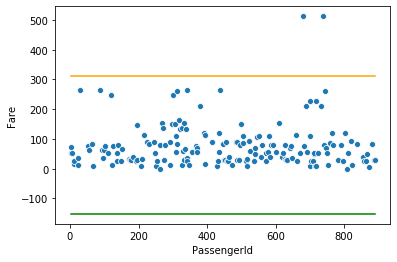

In [128]:
sns.scatterplot(x = p6['PassengerId'], y = p6['Fare'])
sns.lineplot(x = p6['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = p6['PassengerId'], y = xu, color = 'orange')

In [132]:
p6_sd = p6[(p6['Fare']>=xl) & (p6['Fare']<=xu)]

In [133]:
p6_sd[['Fare']].describe()

,Fare
count,173.000000
mean,73.949133
std,61.587056
min,0.000000
25%,29.700000
50%,56.929200
75%,90.000000
max,263.000000


In [134]:
p6['Fare_sd'] = np.where(
    p6['Fare']<xl,
    xl,
    np.where(
        p6['Fare']>xu,
        xu,
        p6['Fare']
    )
)

In [135]:
p6[['Fare', 'Fare_sd']].describe()

,Fare,Fare_sd
count,175.000000,175.000000
mean,78.959191,76.647293
std,77.026328,66.202064
min,0.000000,0.000000
25%,29.700000,29.700000
50%,56.929200,56.929200
75%,90.539600,90.539600
max,512.329200,310.038175


In [140]:
pl = np.percentile(p7['Fare'], 5)
pu = np.percentile(p7['Fare'], 95)
sns.scatterplot(x = p7['PassengerId'], y = p7['Fare'])
sns.lineplot(x = p7['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = p7['PassengerId'], y = pu, color = 'green')

In [142]:
p7_sd = p7[(p7['Fare']>=pl) & (p7['Fare']<=pu)]
p7_sd[['Fare']].describe()

,Fare
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [144]:
p7['Fare_pct'] = np.where(
    p7['Fare']<pl,
    pl,
    np.where(
        p7['Fare']>pu,
        pu,
        p7['Fare']
    )
)

In [145]:
p7[['Fare', 'Fare_sd', 'Fare_pct']].describe()

,Fare,Fare_sd,Fare_pct
count,175.000000,175.000000,175.000000
mean,78.959191,76.647293,78.959191
std,77.026328,66.202064,77.026328
min,0.000000,0.000000,0.000000
25%,29.700000,29.700000,29.700000
50%,56.929200,56.929200,56.929200
75%,90.539600,90.539600,90.539600
max,512.329200,310.038175,512.329200


In [ ]:
#Hubo muchos métodos que gracias a que NO logré instalar los paquetes no pude comprobar bien, de los que sí logré comprobar
#creo que el mejor es pairwise, ya que puedo hacer comparaciones de datos y únicamente toma en cuenta los que sí tengo a la mano
#y eso representa que no elimino datos de esa fila que me podrían servir. Aquí tenemos una ventaja, de 180 lineas que hay, el 
#que más tiene faltantes es uno con 50, un poco más del 25%. Es significativo, sí, pero el resto tienen menos del 15% de faltantes.
#Ahora, de los métodos que no logré usar los que más me hubiera gustado probar es el de imputación de la moda (ya que estadísticamente
#me dice que hay más probabilidad que toque ese número que otro aunque puedo fallar) y el de imputación sectorizada.
#